# Week 5 – End-to-End Data Analysis Project
## Dataset: Netflix Movies & TV Shows

**Author:** Nida Dabir  
**Objective:** Perform complete data analysis including loading, cleaning, visualization, and business insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
df = pd.read_csv(r"C:\Users\Nida\PyCharmMiscProject\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Data Understanding
- Checked dataset shape
- Examined data types
- Identified missing values
- Reviewed summary statistics

In [7]:
df.drop_duplicates(inplace=True)

In [12]:
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Not Available")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [18]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df[['date_added', 'year_added']].head()

,date_added,year_added
0,2021-09-25,2021.0
1,2021-09-24,2021.0
2,2021-09-24,2021.0
3,2021-09-24,2021.0
4,2021-09-24,2021.0


## Dataset Overview
In this section, we explore the structure and basic statistics of the Netflix dataset.

In [15]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


,date_added,release_year
count,8709,8807.000000
mean,2019-05-23 01:45:29.452290816,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-20 00:00:00,2013.000000
50%,2019-07-12 00:00:00,2017.000000
75%,2020-08-26 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


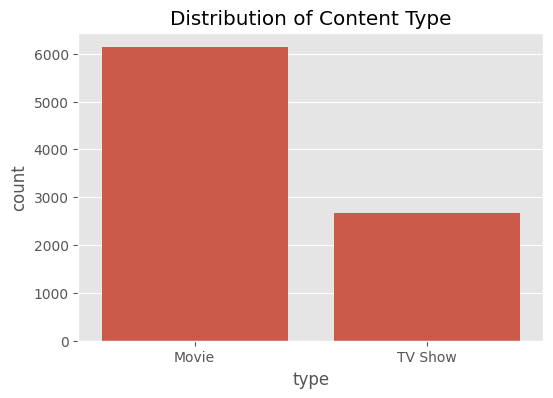

In [16]:
# Plot 1 – Content Type Distribution

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Type")
plt.show()

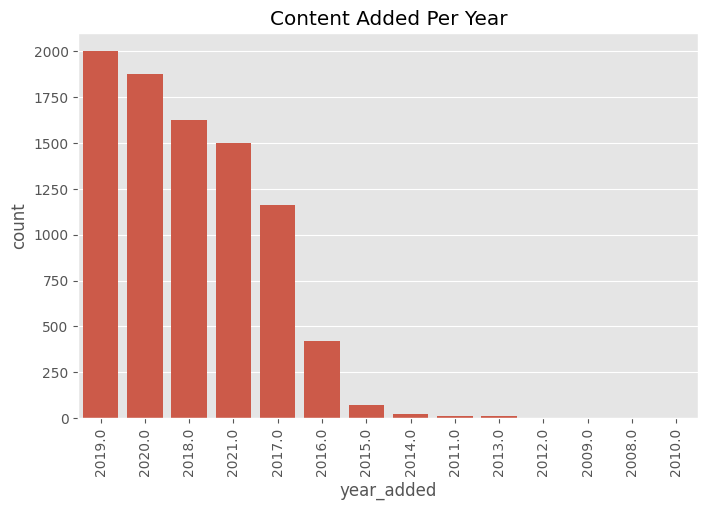

In [19]:
# Plot 2 – Content Added Per Year


plt.figure(figsize=(8,5))
sns.countplot(data=df, x='year_added',
              order=df['year_added'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Content Added Per Year")
plt.show()

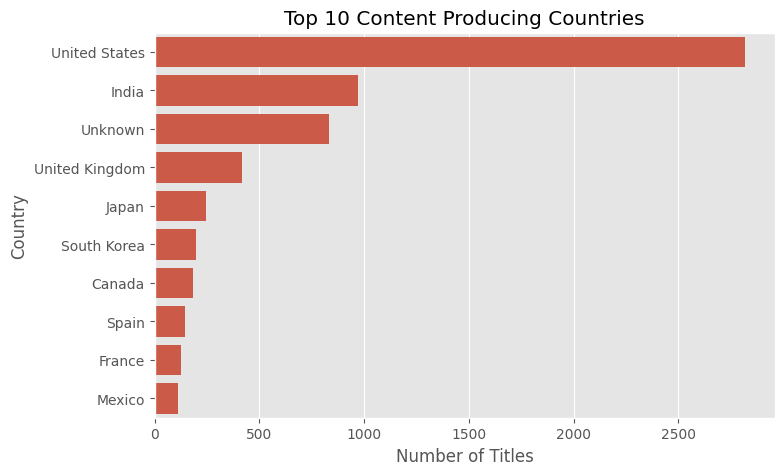

In [20]:
# Plot: Top 10 Countries Producing Content

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

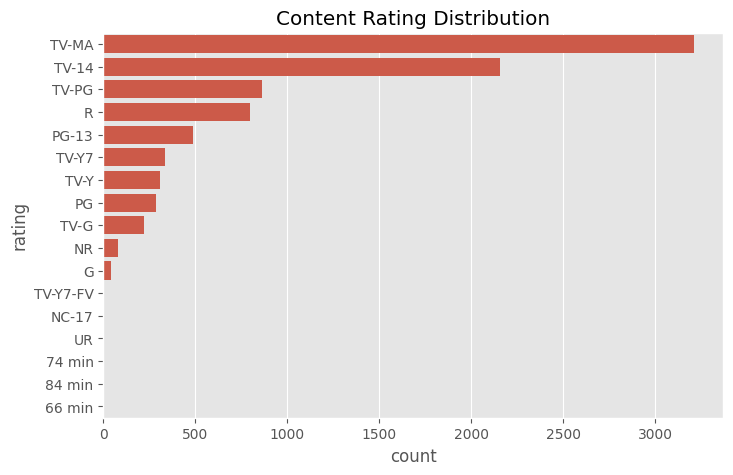

In [21]:
# Plot: Ratings Distribution

plt.figure(figsize=(8,5))
sns.countplot(data=df, y='rating',
              order=df['rating'].value_counts().index)
plt.title("Content Rating Distribution")
plt.show()

In [22]:
# Plot: Movies Duration Distribution

df['duration_numeric'] = df['duration'].str.extract('(\d+)')
df['duration_numeric'] = pd.to_numeric(df['duration_numeric'], errors='coerce')

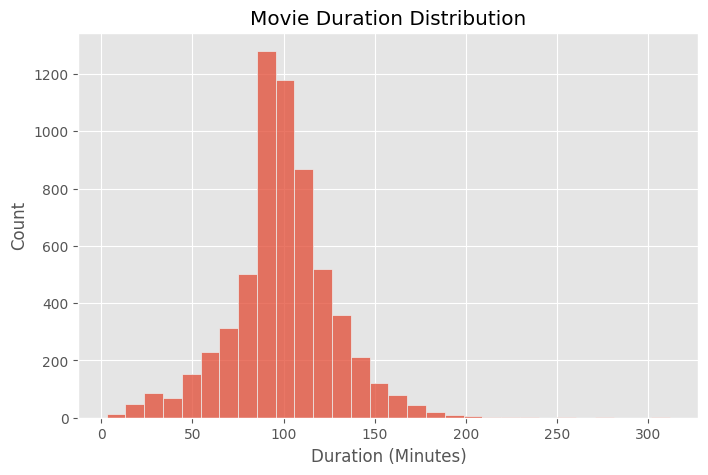

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['type']=='Movie']['duration_numeric'], bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (Minutes)")
plt.show()

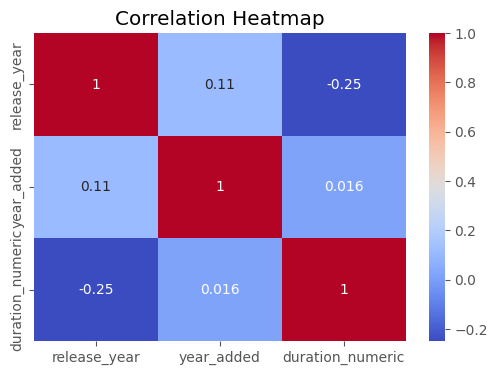

In [24]:
# Correlation Heatmap (Numeric Columns)

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Correlation is low, meaning release year does not strongly influence duration or addition year.

# Business Insights

Movies dominate Netflix’s content library compared to TV Shows.

The United States produces the highest number of Netflix titles.

Most content is rated TV-MA and TV-14, indicating adult-oriented programming.

Content addition increased significantly after 2015.

Most movies fall between 80–120 minutes, suggesting standard film duration preference.

## Final Conclusion

This project demonstrated complete end-to-end data analysis including
data cleaning, feature engineering, visualization, and business insights.

In [1]:
import os
os.getcwd()

'C:\\Users\\Nida'

In [ ]:
import shutil

shutil.move(
    r"C:\Users\Nida\.ipynb",
    r"C:\Users\Nida\PyCharmMiscProject\Week5_End_to_End_Project\YourNotebookName.ipynb"
)